In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('"C:\Users\lenovo\Documents\GitHub\Deep-Learning-Basics-Practice\datasets/flower_photos"', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

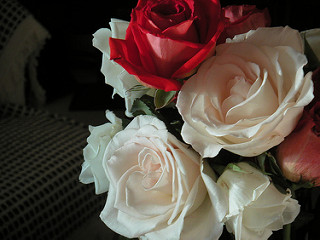

In [8]:
PIL.Image.open(str(roses[1]))

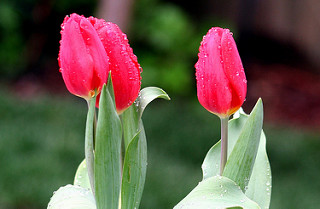

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict={
    'roses':0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]


[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])


'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))


In [15]:
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X,y=[],[]
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
X_train_scalled=X_train/255
X_test_scalled=X_test/255

In [21]:
num_classes=5

model=keras.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
optimizer='adam',
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

model.fit(X_train_scalled,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 5s 11ms/step - loss: 1.2757 - accuracy: 0.4513
Epoch 2/30
92/92 [==============================] - 1s 10ms/step - loss: 1.0012 - accuracy: 0.6029
Epoch 3/30
92/92 [==============================] - 1s 10ms/step - loss: 0.8365 - accuracy: 0.6723
Epoch 4/30
92/92 [==============================] - 1s 9ms/step - loss: 0.6859 - accuracy: 0.7309
Epoch 5/30
92/92 [==============================] - 1s 9ms/step - loss: 0.4975 - accuracy: 0.8144
Epoch 6/30
92/92 [==============================] - 1s 9ms/step - loss: 0.3645 - accuracy: 0.8733
Epoch 7/30
92/92 [==============================] - 1s 9ms/step - loss: 0.2061 - accuracy: 0.9366
Epoch 8/30
92/92 [==============================] - 1s 9ms/step - loss: 0.1511 - accuracy: 0.9544
Epoch 9/30
92/92 [==============================] - 1s 9ms/step - loss: 0.0712 - accuracy: 0.9816
Epoch 10/30
92/92 [==============================] - 1s 9ms/step - loss: 0.0423 - accuracy: 0.9874
Epoch 11/30
92/9

In [22]:
model.evaluate(X_test_scalled,y_test)

23/23 [==============================] - 0s 8ms/step - loss: 2.4636 - accuracy: 0.6907


[2.46362042427063, 0.6907356977462769]

In [23]:
predictions=model.predict(X_test_scalled)
predictions

23/23 [==============================] - 0s 4ms/step


array([[-6.1470981e+00,  8.4112626e-01,  1.7781862e+01, -1.9256027e+01,
        -3.7624056e+00],
       [-3.2797167e+00,  2.5943859e+00,  1.2683449e+01, -7.8504615e+00,
        -4.0788689e+00],
       [ 7.4650536e+00, -3.8425140e+00, -2.1808640e+01, -6.9293709e+00,
         1.7098635e+01],
       ...,
       [ 2.6779330e+00,  6.3840752e+00,  2.3966696e+00, -2.6489418e+01,
         9.9203444e+00],
       [-1.8132907e+00,  3.2226760e+00,  9.7587532e-01,  5.0177164e-03,
         9.6029538e-01],
       [-1.4545962e+01,  4.1956646e+01, -6.2669954e+00, -8.4310760e+00,
         9.8408670e+00]], dtype=float32)

In [24]:
score=tf.nn.softmax(predictions[5])


In [25]:
np.argmax(score)

3

In [26]:
y_test[5]

3

In [27]:
X[0].shape

(128, 128, 3)

In [33]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(128, 
                                                              128,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

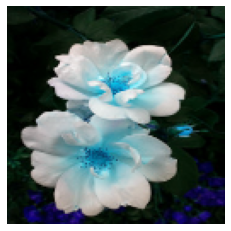

In [34]:
plt.axis('off')
plt.imshow(X[0])

In [35]:
X.shape

(3670, 128, 128, 3)

In [36]:
data_augmentation(X[:2])[0]

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[ 8.38396   , 25.362453  , 11.398852  ],
        [ 8.515777  , 25.475187  , 11.573289  ],
        [11.08308   , 27.712364  , 14.900711  ],
        ...,
        [ 2.863611  ,  9.711948  ,  5.78561   ],
        [ 2.0108182 ,  8.436106  ,  2.796598  ],
        [ 1.9605165 ,  8.359372  ,  2.6396477 ]],

       [[ 8.364879  , 25.361792  , 11.437415  ],
        [ 8.49627   , 25.467588  , 11.60568   ],
        [11.052746  , 27.57219   , 14.811587  ],
        ...,
        [ 2.816534  ,  9.77982   ,  5.824361  ],
        [ 1.9698985 ,  8.567639  ,  2.794361  ],
        [ 1.9200228 ,  8.494083  ,  2.6354907 ]],

       [[ 7.9022226 , 25.454397  , 12.324168  ],
        [ 8.016177  , 25.418856  , 12.360837  ],
        [10.205171  , 24.827007  , 12.997087  ],
        ...,
        [ 2.2021072 , 11.604962  ,  6.8037667 ],
        [ 1.6589375 , 11.777607  ,  3.1871674 ],
        [ 1.6272807 , 11.774033  ,  3.0022435 ]],

       ...,

     

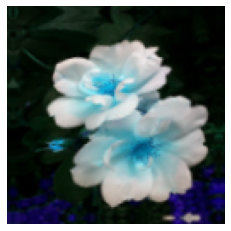

In [37]:
plt.axis('off')
plt.imshow(data_augmentation(X[:2])[0].numpy().astype("uint8"))

In [42]:
num_classes = 5

model2 = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(50, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model2.fit(X_train_scalled, y_train, epochs=30) 

Epoch 1/30
92/92 [==============================] - 16s 156ms/step - loss: 1.2580 - accuracy: 0.4465
Epoch 2/30
92/92 [==============================] - 14s 148ms/step - loss: 1.0527 - accuracy: 0.5974
Epoch 3/30
92/92 [==============================] - 14s 149ms/step - loss: 0.9709 - accuracy: 0.6236
Epoch 4/30
92/92 [==============================] - 14s 154ms/step - loss: 0.8802 - accuracy: 0.6587
Epoch 5/30
92/92 [==============================] - 14s 148ms/step - loss: 0.8180 - accuracy: 0.6921
Epoch 6/30
92/92 [==============================] - 14s 153ms/step - loss: 0.7878 - accuracy: 0.7027
Epoch 7/30
92/92 [==============================] - 14s 148ms/step - loss: 0.7561 - accuracy: 0.7084
Epoch 8/30
92/92 [==============================] - 14s 151ms/step - loss: 0.7103 - accuracy: 0.7323
Epoch 9/30
92/92 [==============================] - 14s 149ms/step - loss: 0.6751 - accuracy: 0.7408
Epoch 10/30
92/92 [==============================] - 14s 151ms/step - loss: 0.6486 - accura

In [43]:
model2.evaluate(X_test_scalled,y_test)

23/23 [==============================] - 0s 10ms/step - loss: 0.9635 - accuracy: 0.7207


[0.9634965658187866, 0.720708429813385]